In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
from scipy.spatial.distance import cdist

## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'Fixation report_VPa.csv'
FixData=pd.read_csv(FilePath, sep=';',header=0)
print(np.shape(FixData))


(93276, 10)


In [5]:
FixData

,RECORDING_SESSION_LABEL,TRIAL_INDEX,?images,images_category,Session_Name_,CURRENT_FIX_DURATION,CURRENT_FIX_X,CURRENT_FIX_Y,CURRENT_FIX_START,CURRENT_FIX_END
0,VP01,1,AB_Baumeister.png,AB,VP01,811,1975,1119,12,822
1,VP01,1,AB_Baumeister.png,AB,VP01,169,1170,698,890,1058
2,VP01,1,AB_Baumeister.png,AB,VP01,307,1096,415,1103,1409
3,VP01,1,AB_Baumeister.png,AB,VP01,364,2230,288,1465,1828
4,VP01,1,AB_Baumeister.png,AB,VP01,288,2002,272,1855,2142
...,...,...,...,...,...,...,...,...,...,...
93271,VP60,12,AB_Nay.png,AB,VP60,472,927,845,58001,58472
93272,VP60,12,AB_Nay.png,AB,VP60,473,1182,1348,58517,58989
93273,VP60,12,AB_Nay.png,AB,VP60,279,1202,1223,59016,59294
93274,VP60,12,AB_Nay.png,AB,VP60,336,950,1661,59337,59672


## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (93276, 10)
presentation size:  x= 2880 pixels y= 2160  pixels
presentation size:  x= 2880 pixels y= 2160  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 46 subjects, and 12 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
AB_Baumeister.png
stimulus size in y is full screen
stimulus size in x full screen
 
AB_Kandinsky.png
stimulus size in y is full screen
stimulus size in x full screen
 
AB_Kupka.png
stimulus size in y is full screen
stimulus size in x full screen
 
AB_Magnelli.png
stimulus size in y is full screen
stimulus size in x full screen
 
AB_Nay.png
stimulus size in y is full screen
stimulus size in x full scree

(array(['AB_Baumeister.png', 'AB_Kandinsky.png', 'AB_Kupka.png',
        'AB_Magnelli.png', 'AB_Nay.png', 'AB_Winter.png',
        'STL_Baschenis.png', 'STL_Bettera.png', 'STL_Craens.png',
        'STL_Heda.png', 'STL_Munari.png', 'STL_VanSchooten.png'],
       dtype=object),
 array(['VP01', 'VP04', 'VP06', 'VP08', 'VP09', 'VP10', 'VP11', 'VP12',
        'VP13', 'VP14', 'VP17', 'VP18', 'VP19', 'VP23', 'VP24', 'VP25',
        'VP26', 'VP28', 'VP29', 'VP30', 'VP31', 'VP32', 'VP34', 'VP35',
        'VP36', 'VP37', 'VP38', 'VP39', 'VP40', 'VP41', 'VP42', 'VP43',
        'VP44', 'VP45', 'VP46', 'VP47', 'VP48', 'VP49', 'VP50', 'VP52',
        'VP55', 'VP56', 'VP58', 'VP59', 'VP60', 'VP62'], dtype=object))

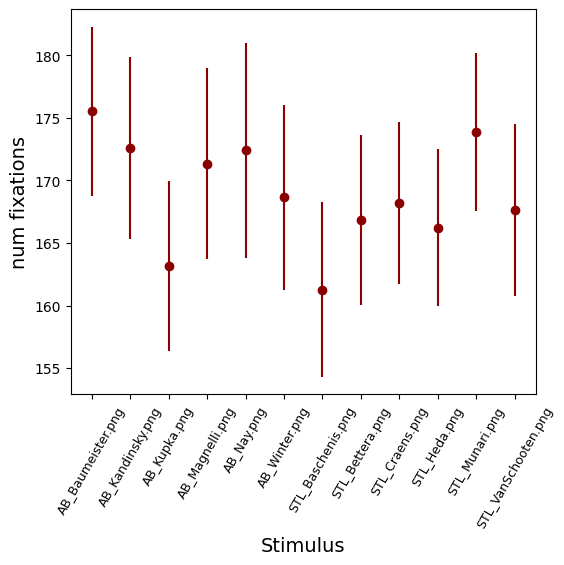

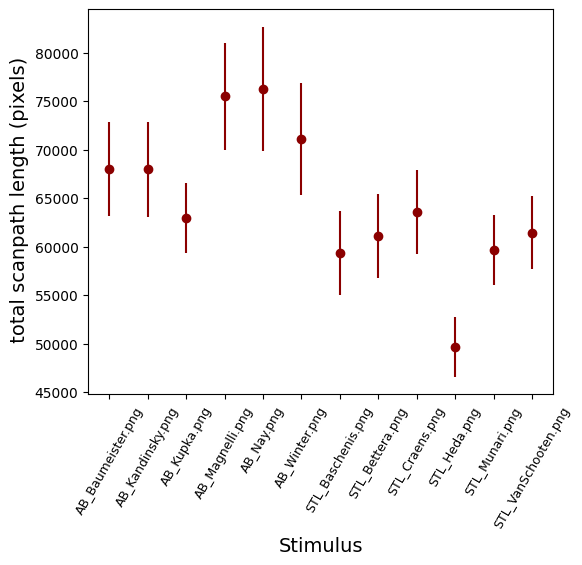

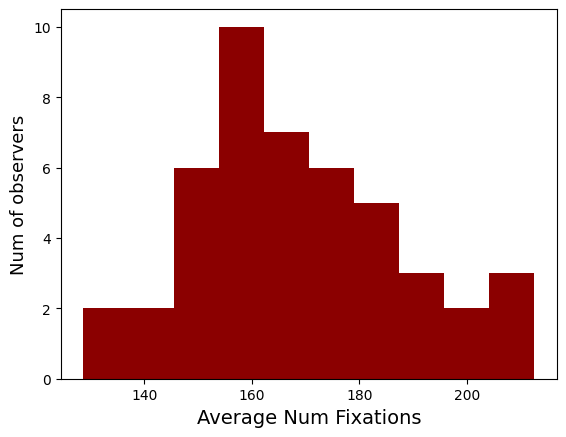

In [6]:

sizeX,sizeY=2880,2160


Vpa=EyeData(FixData,sizeX,sizeY)
Vpa.DataInfo(FixDuration='length',Stimulus='?images',subjectID='RECORDING_SESSION_LABEL',StimPath=Path+'stimuli_nobody_to_see/',StimExt='.png', mean_x='CURRENT_FIX_X', mean_y='CURRENT_FIX_Y')
Vpa.RunDescriptiveFix(Visual=1)


In [7]:
SaccadeObj=Vpa.GetSaccades()
Saccades=Vpa.SaccadeSel(SaccadeObj,nHor=9,InferS=False)

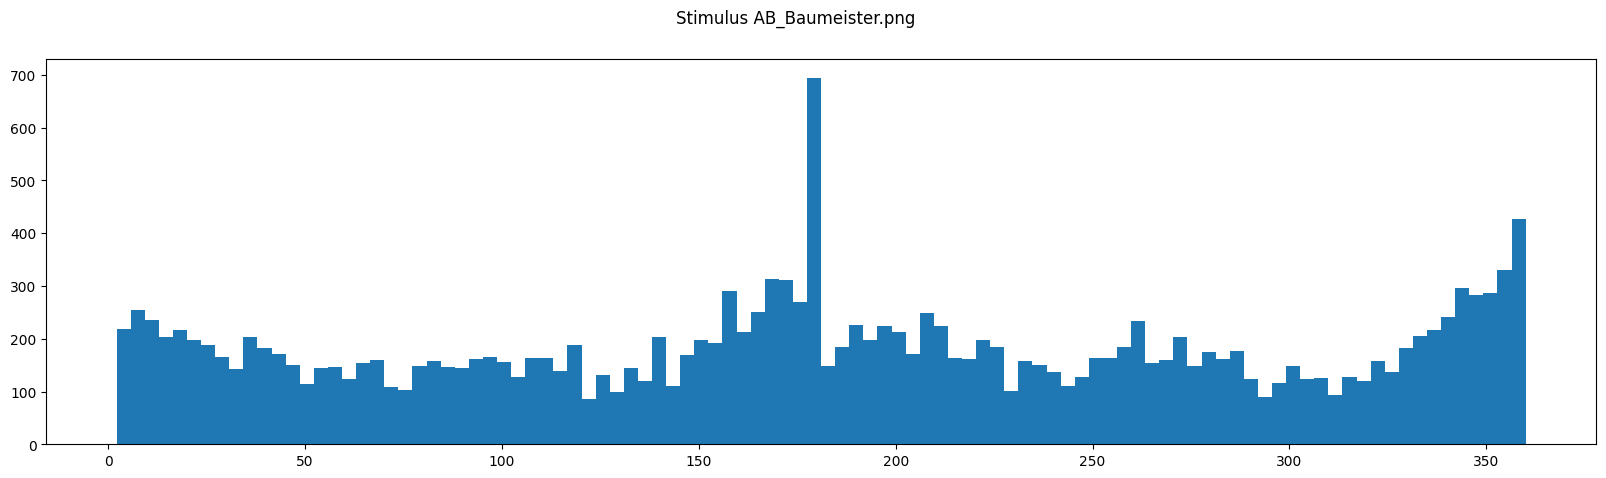

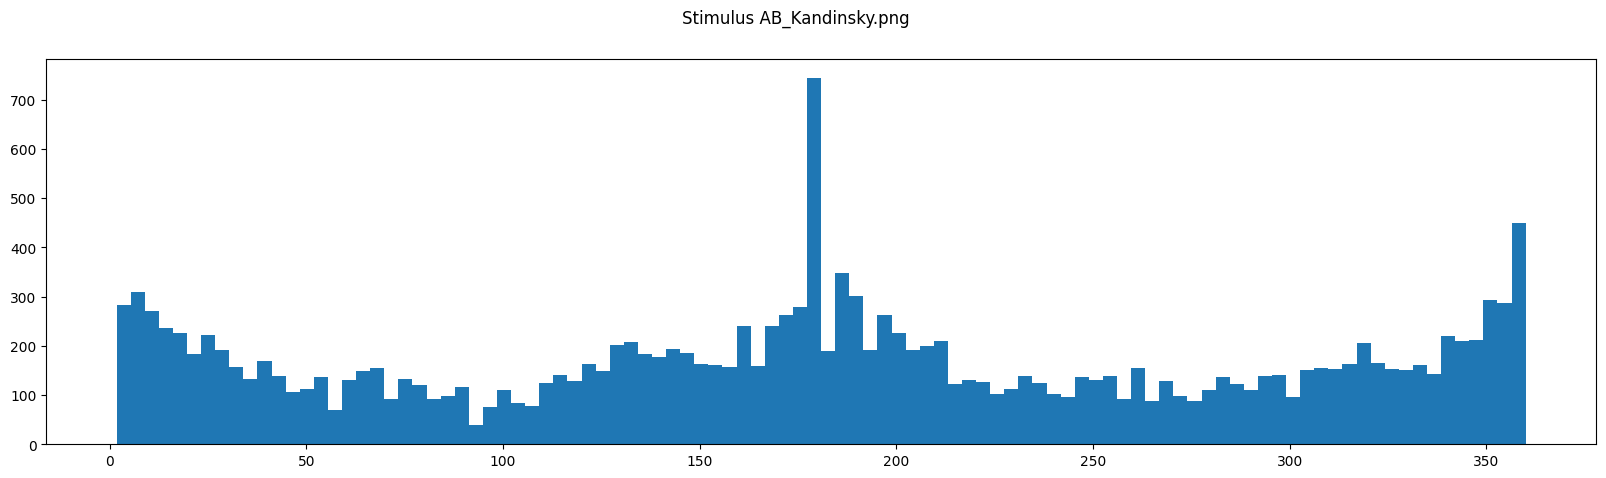

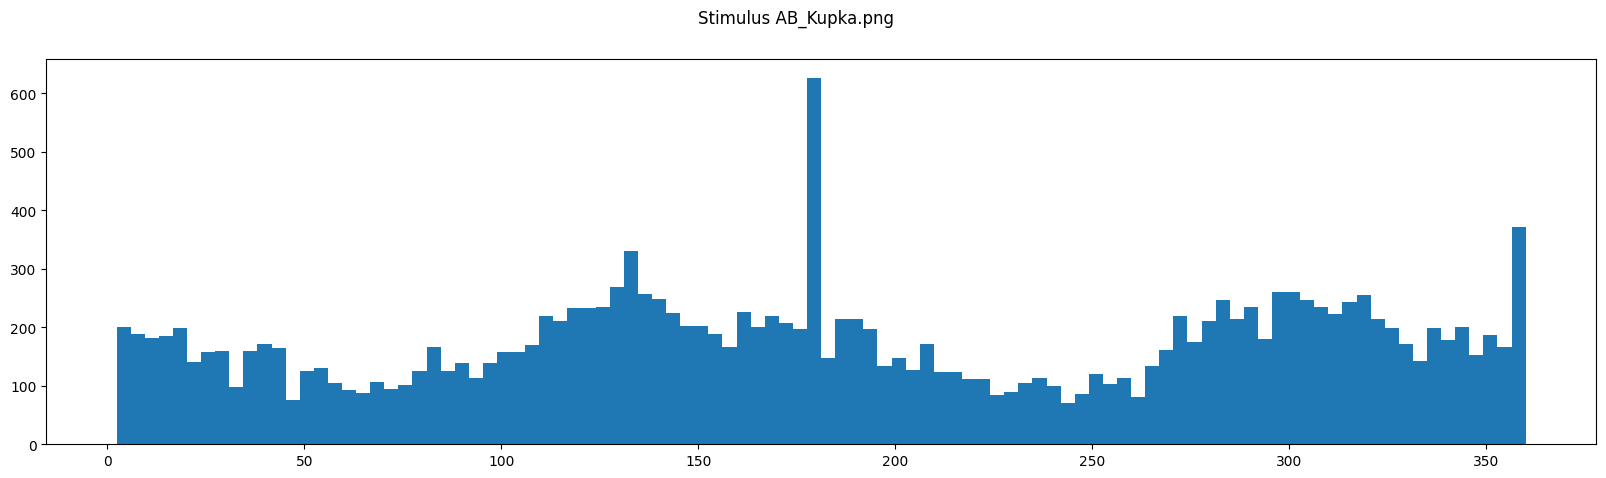

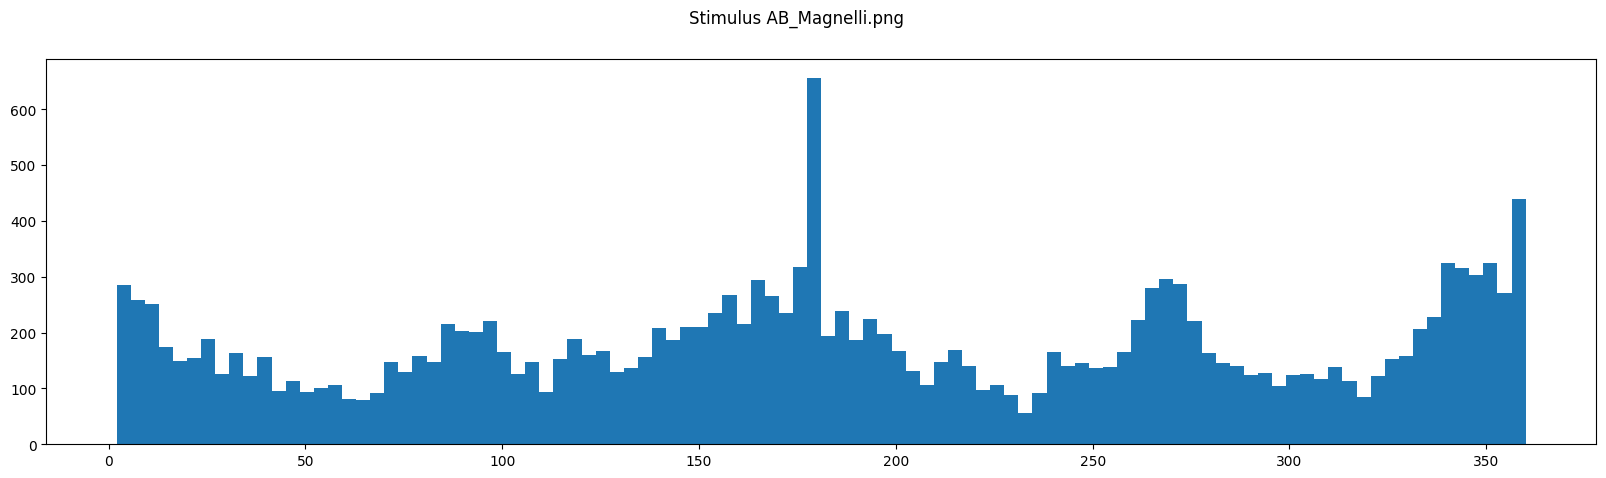

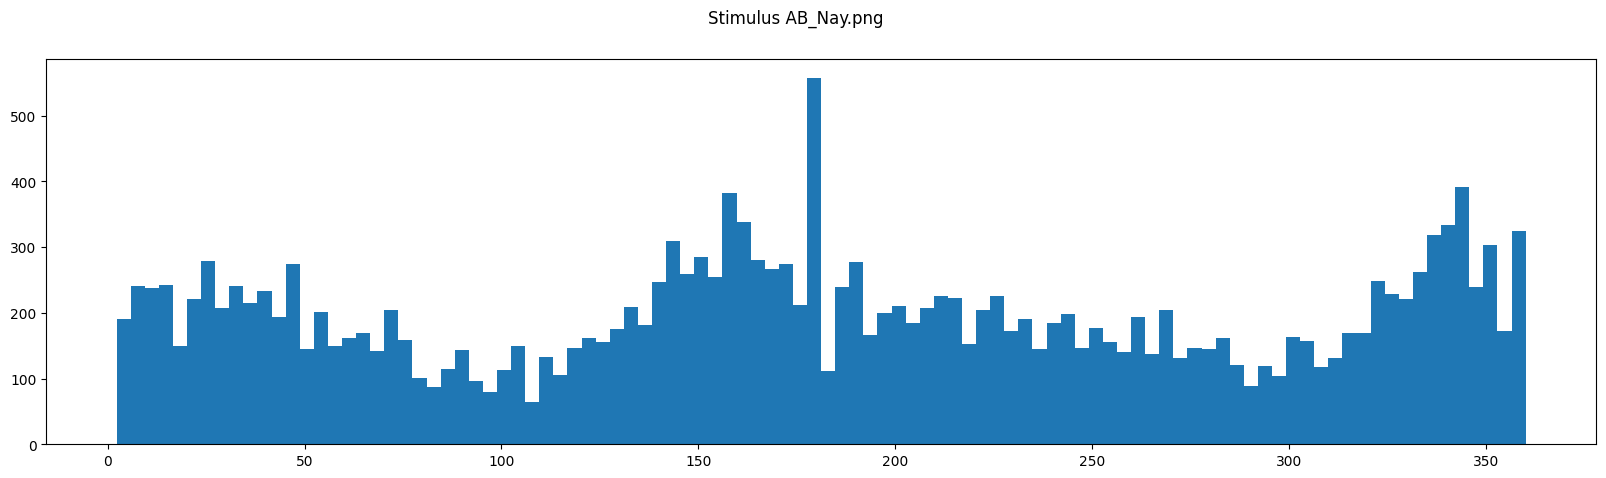

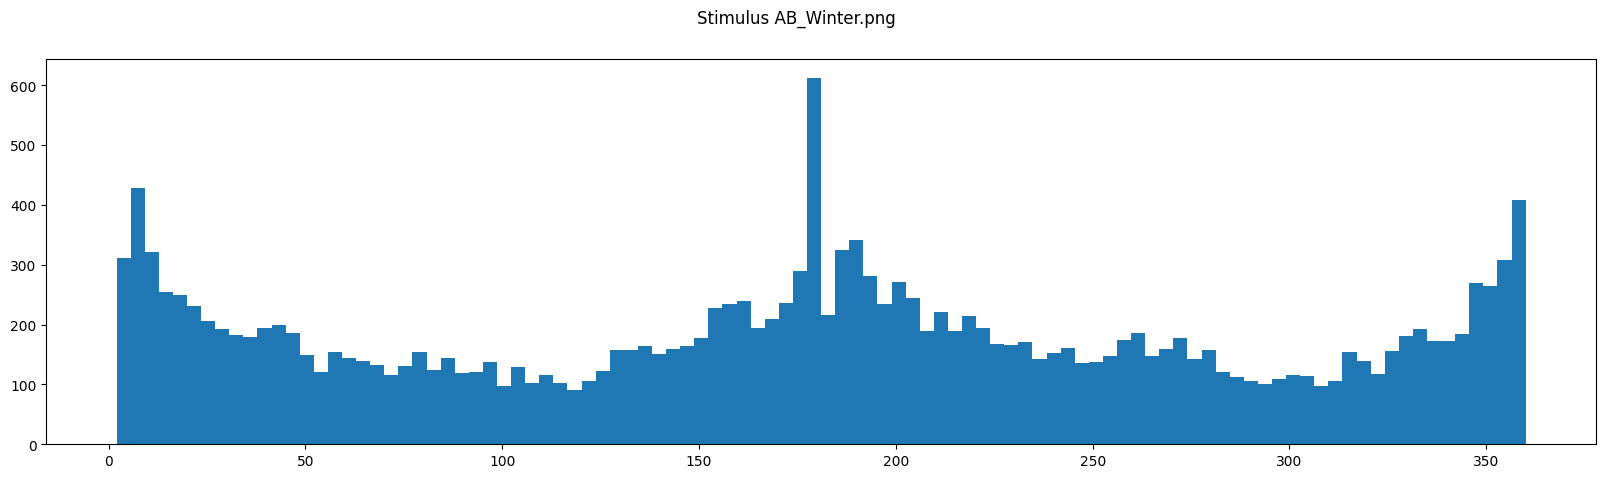

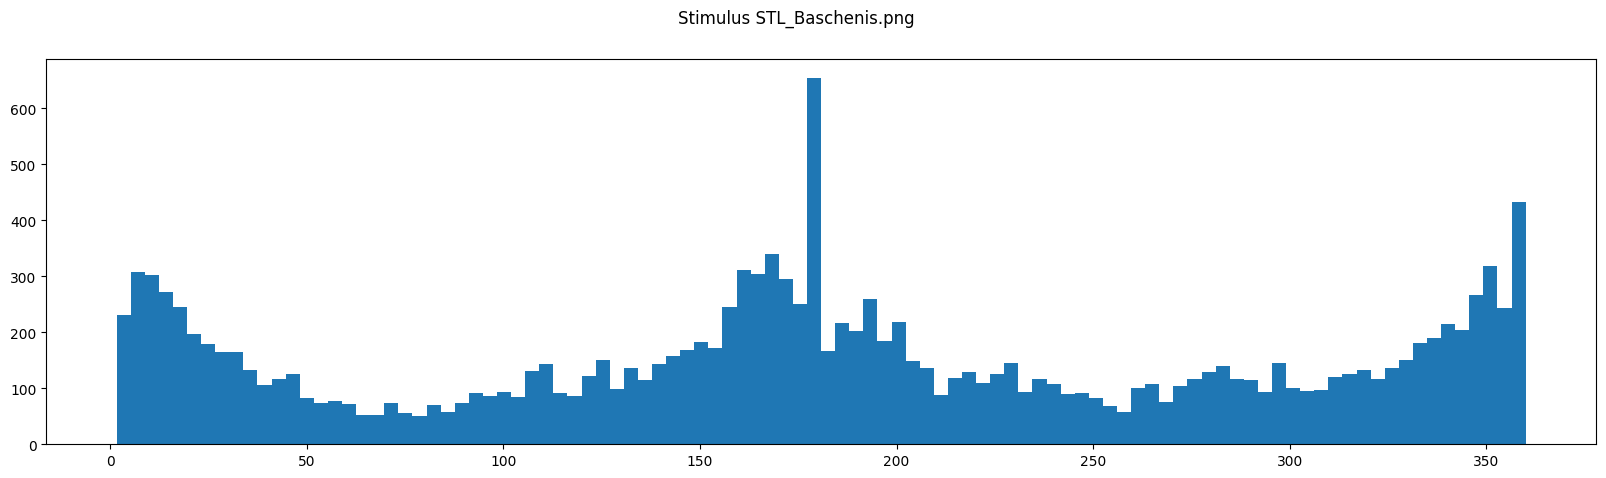

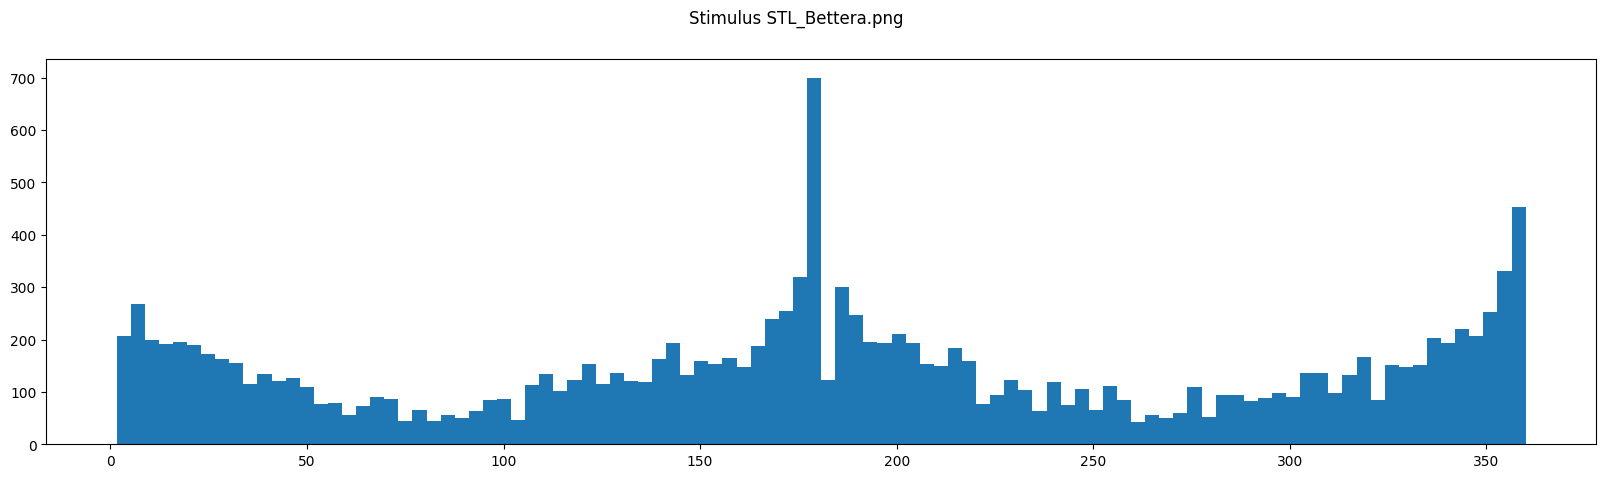

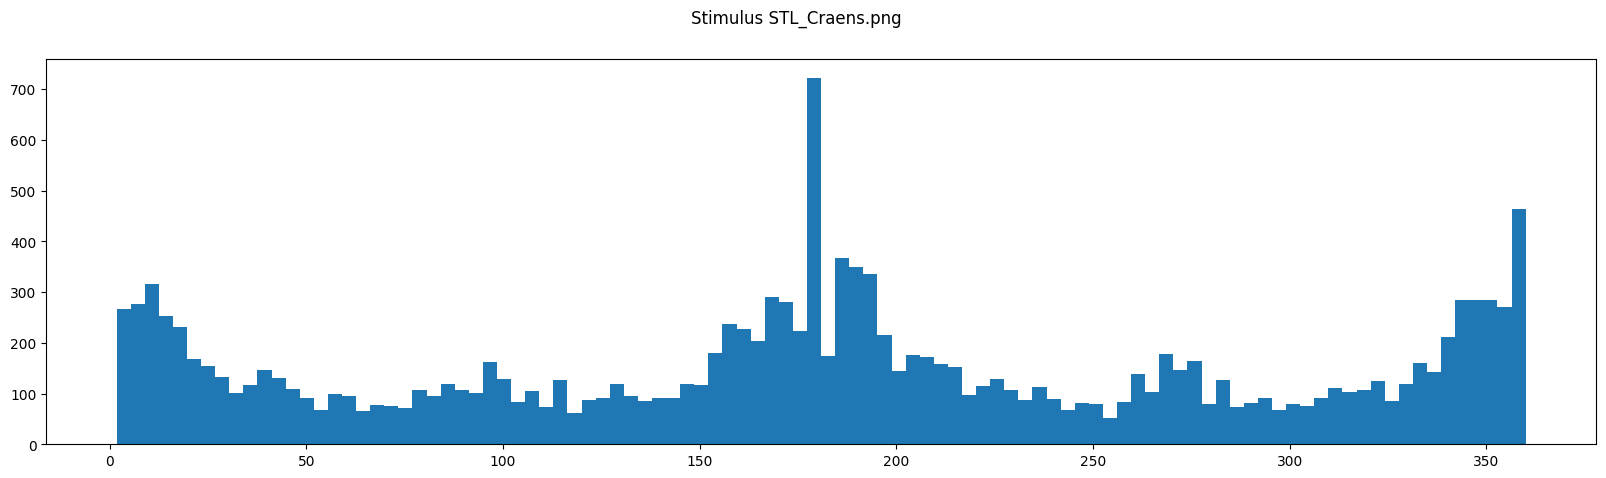

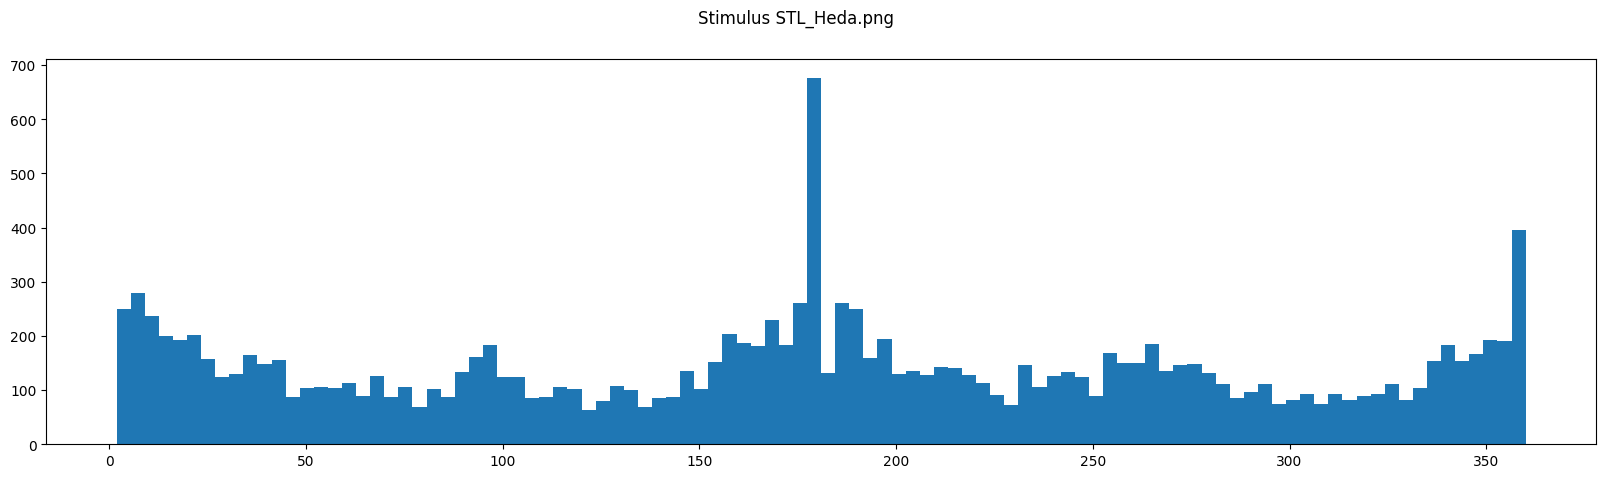

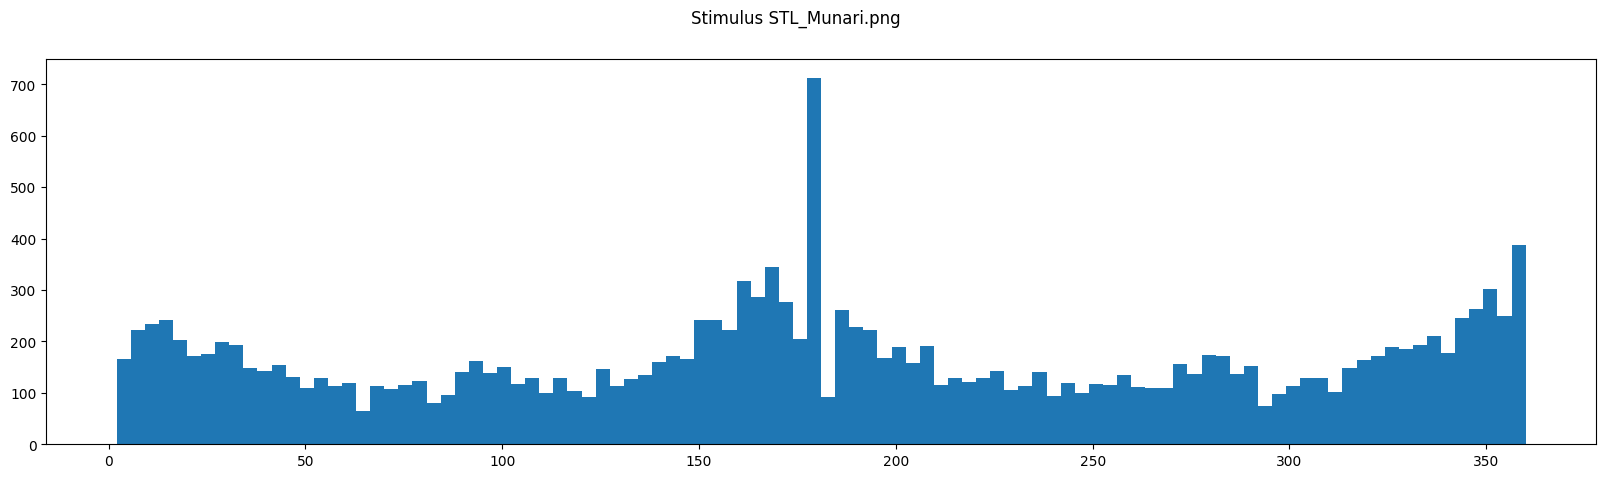

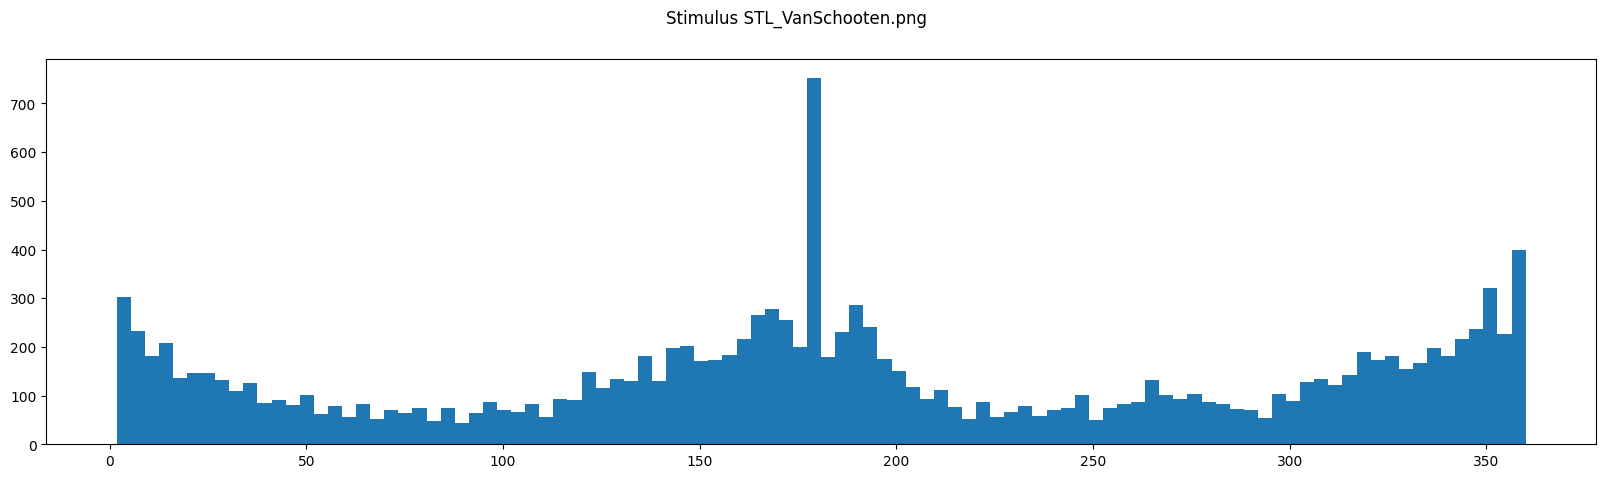

In [19]:
for i,stim in enumerate(Vpa.stimuli):
    stim_saccades = Saccades[:,i,:,:]

    stim_saccades = np.array(stim_saccades)
    fig, ax = plt.subplots(1, 1, figsize=(20, 5))
    fig.suptitle(f'Stimulus {stim}')

    angles = []
    for subj in stim_saccades:
        for h in range(subj.shape[0]):
            for v in range(subj.shape[1]):
                for val in subj[h,v]:
                    angles.append(val)
    ax.hist(angles, bins=100)

We test the the Hidden Markov Model (HMM) compering the pairwaize likelihood of the model with all the stimuli, in order to validate the algorithm.

We create a two matrix of size (n_stimuli, n_stimuli) where each element is the likelihood of the model. We fit the model using train data and then we compute the likelihood of the model for each stimuli in the train and test data.

We put a red dot in corrispondence of the value with the highest likelihood for each stimuli in the test data.

We expect that the red dot is in the diagonal of the matrix, this means that the model is able to predict better the stimuli that it has seen during the training, and in the test data the model is able to predict better data that are similar to the train data.

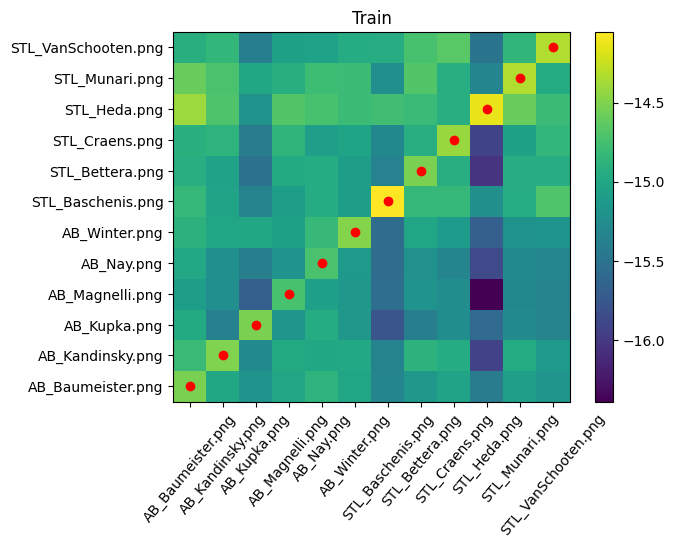

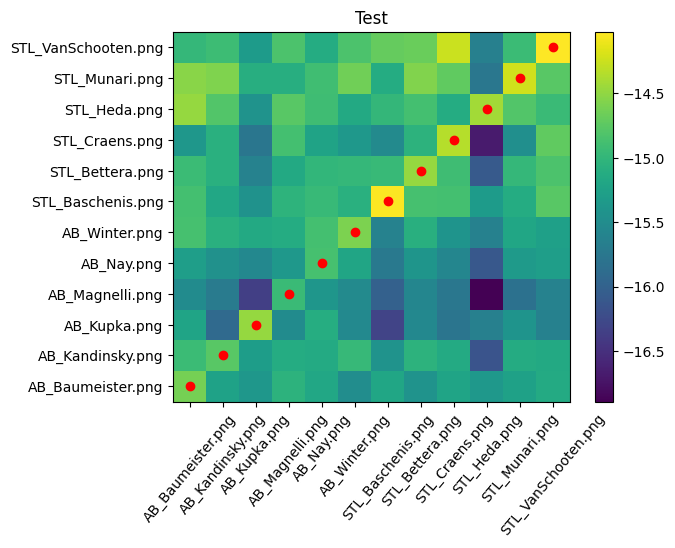

In [8]:
S0, S1 = Vpa.HMMSimPipelineAll2All(ncomp=7, ntest=3)

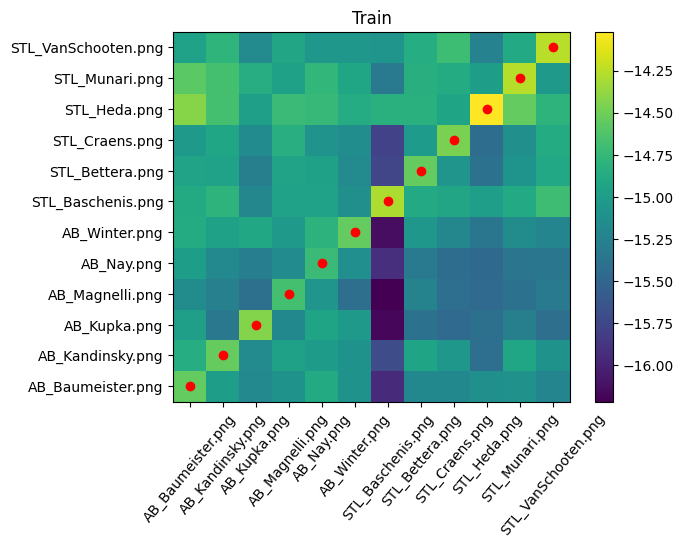

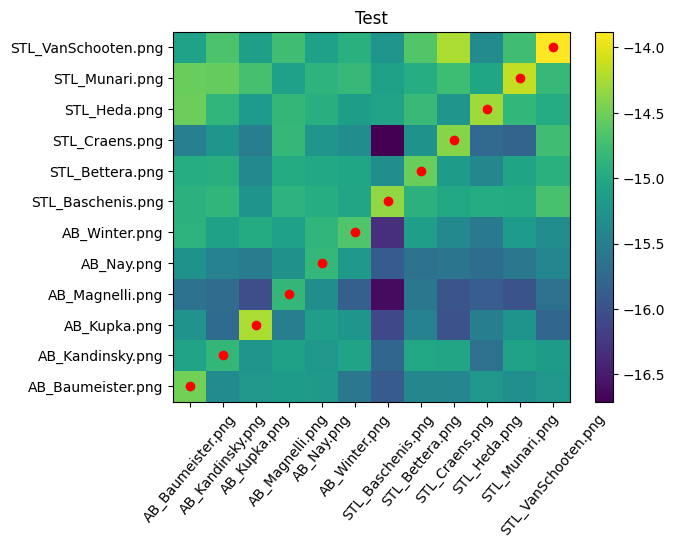

In [11]:
S0, S1 = Vpa.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3)

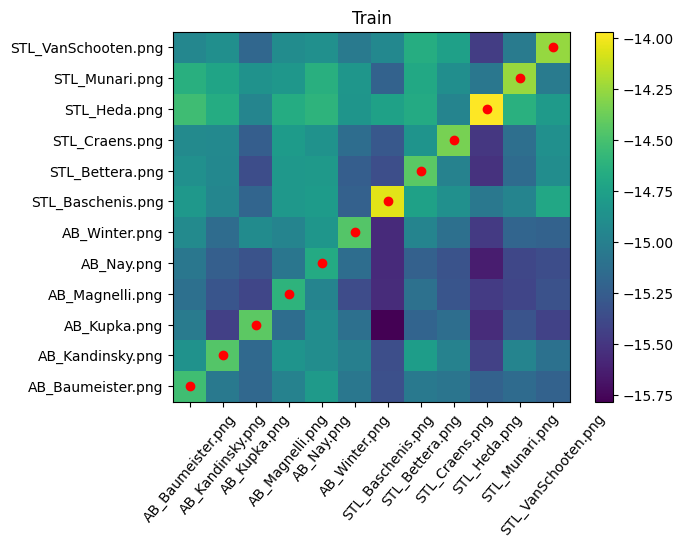

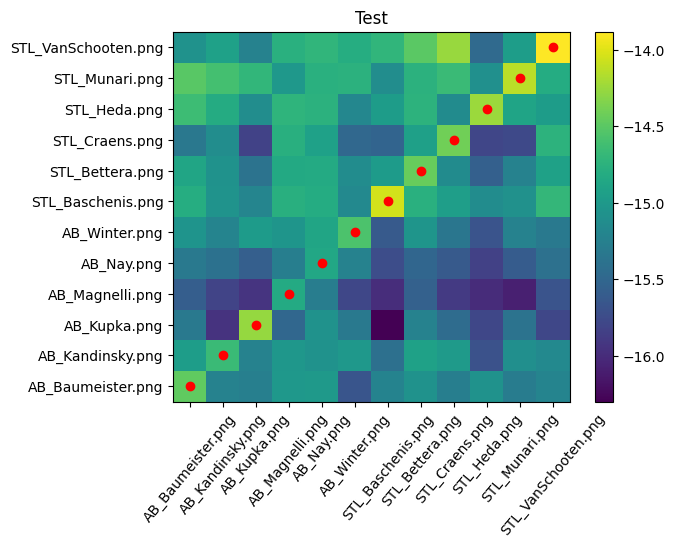

In [10]:
S0, S1 = Vpa.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, iter=10)

We obtain similar performance with 1 to 10 iteration, this means that there is enogh data to obtain always a good fitted model

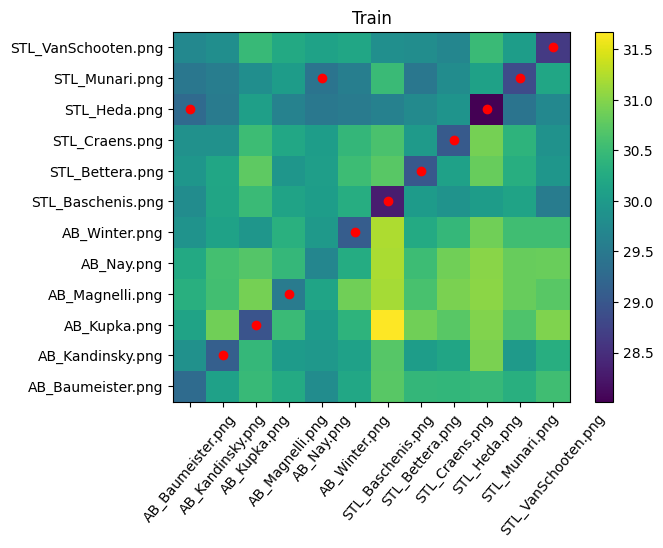

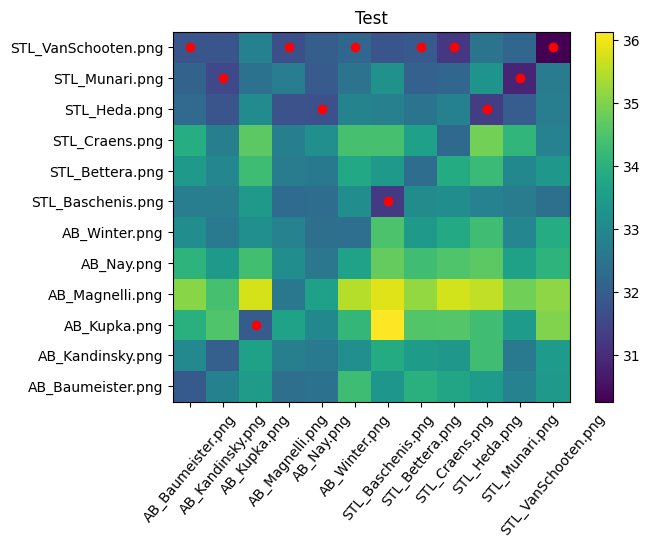

In [12]:
# Computation time is too long for this one 77 minutes with i7-10870H 16GB RAM
S0, S1 = Vpa.HMMSimPipelineAll2All(ncomp=[3,4,5,6,7], ntest=3, bic=True)

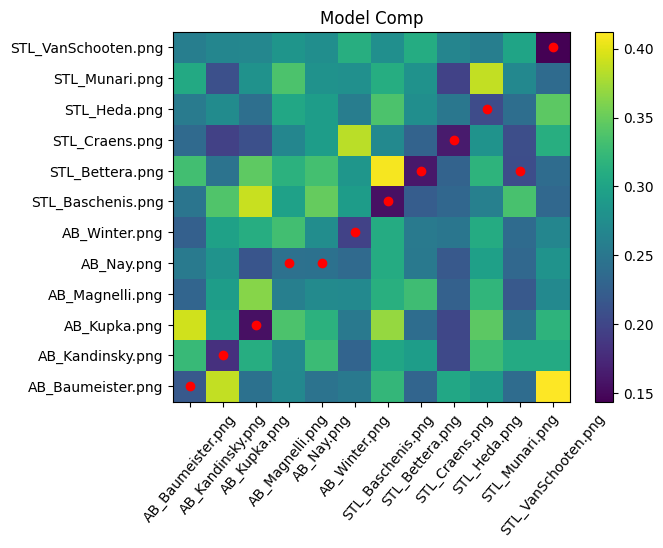

In [42]:
S = Vpa.HMMSimPiepelineModel2Model(ncomp=[2,3,4,5,6,7])

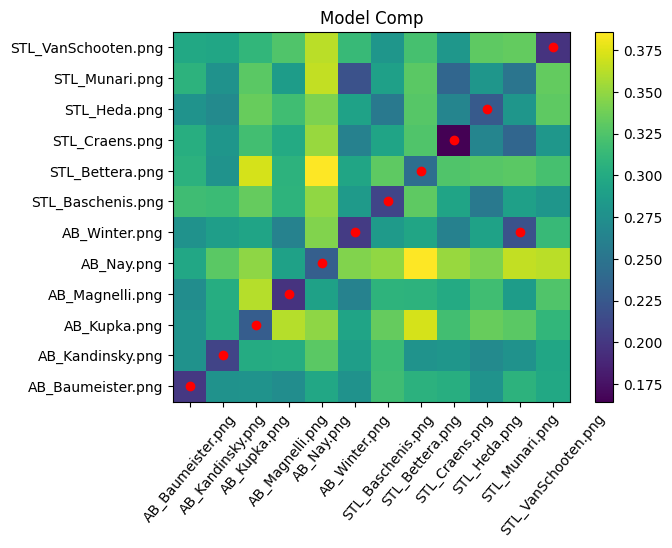

In [43]:
S = Vpa.HMMSimPiepelineModel2ModelOpt(ncomp=[8,9,10])

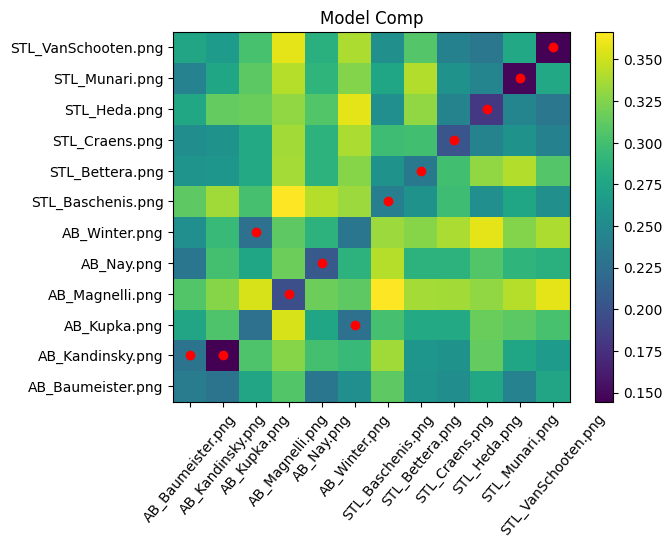

In [46]:
S = Vpa.HMMSimPiepelineModel2ModelOpt(ncomp=[8,9,10], iter=2)

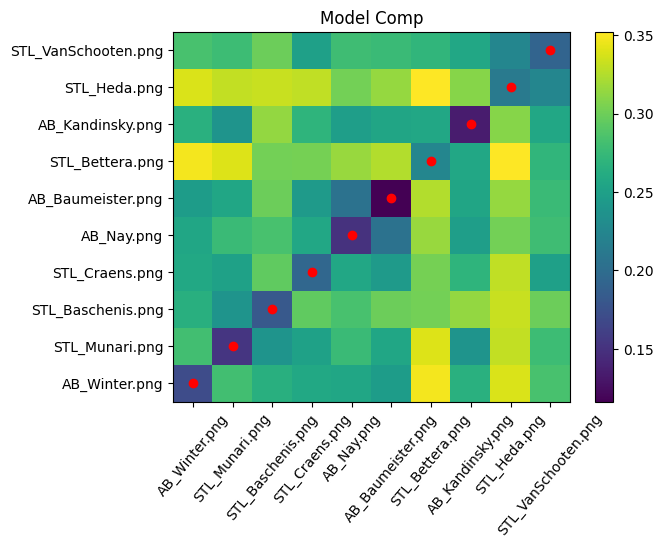

In [ ]:
S = Vpa.HMMSimPiepelineModel2ModelOpt(ncomp=[5,6,7,8,9], iter=3)

## Subject with Subject

In [8]:
stim = Vpa.stimuli[0]
stim

'AB_Baumeister.png'

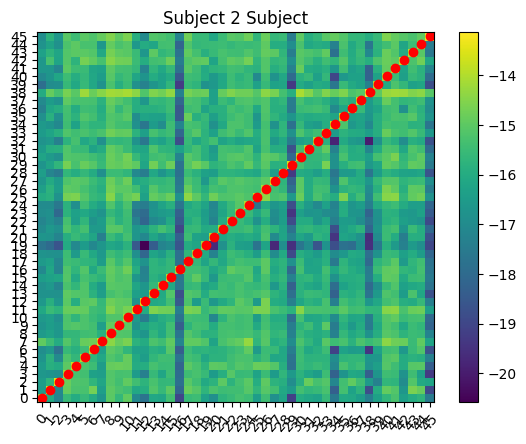

In [84]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[5,6,7,8,9,10], iter=1, stim=stim)

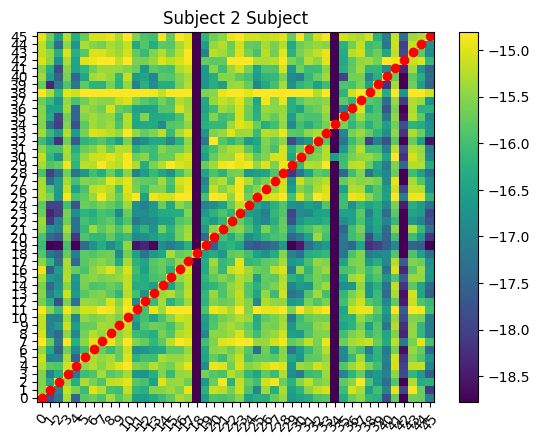

In [ ]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[5,6,7,8,9,10], iter=1, stim=stim, vis='scaled')

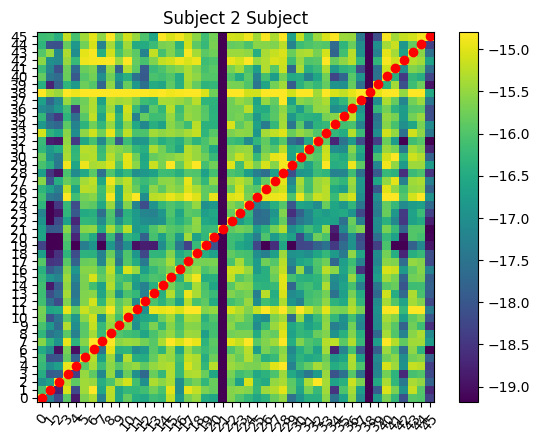

In [76]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=10, stim=stim, vis='scaled')

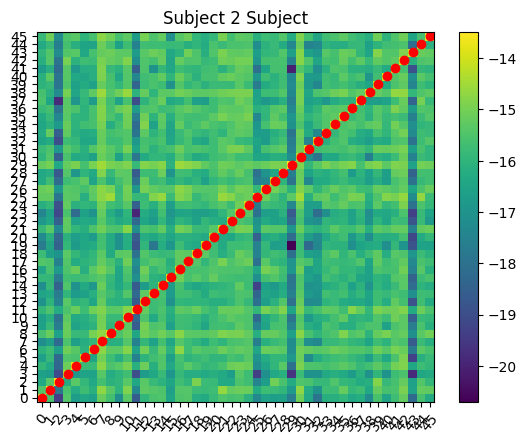

In [15]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=1, stim=stim)

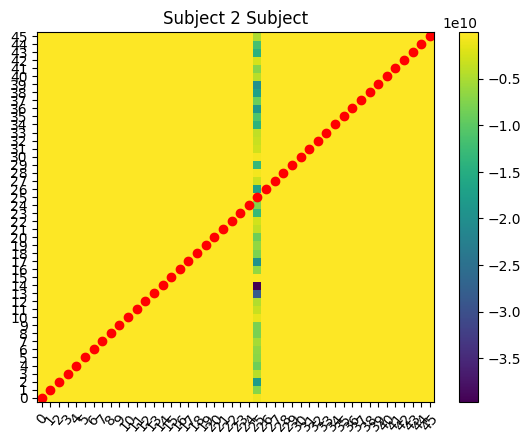

In [29]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[2,3,4,5,6,7,8,9,10], iter=1, stim=stim)

In [ ]:
Sx = np.exp(S)

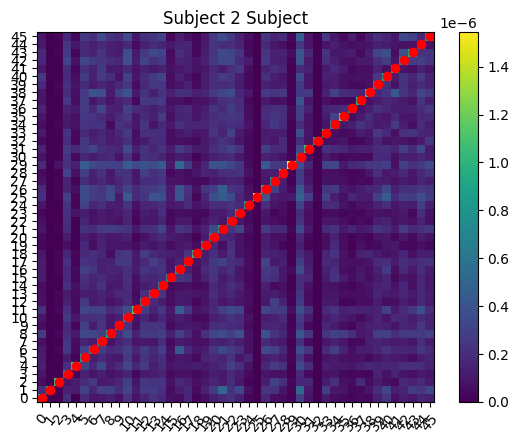

In [ ]:
Vpa.VisSimmat(Sx,'Subject 2 Subject', [indx for indx in range(46)])

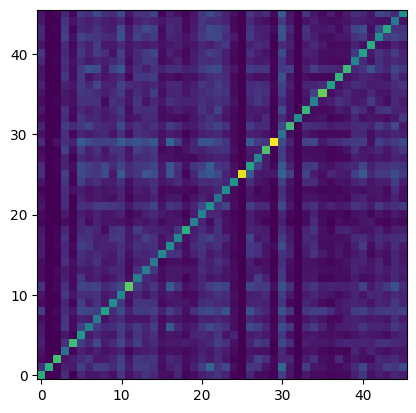

In [24]:
plt.imshow(Sx, origin='lower')

In [30]:
def V(self,simdat,title='', stimuli=None, negative=False):

    if stimuli is None:
        stimuli=self.stimuli

    fig,ax=plt.subplots()

    vmin = np.percentile(simdat, 5)
    vmax = np.percentile(simdat, 95)
    cols = ax.pcolor(simdat, vmin=vmin, vmax=vmax)
    ax.set_xticks(np.arange(len(stimuli))+.5,stimuli,rotation=50)
    ax.set_yticks(np.arange(len(stimuli))+.5,stimuli) #,rotation=50)
    if negative:
        ax.scatter(np.arange(len(stimuli))+.5,np.argmin(simdat,0)+.5,color='r')
    else:
        ax.scatter(np.arange(len(stimuli))+.5,np.argmax(simdat,1)+.5,color='r')
    plt.colorbar(cols,ax=ax)
    ax.set_title(title)

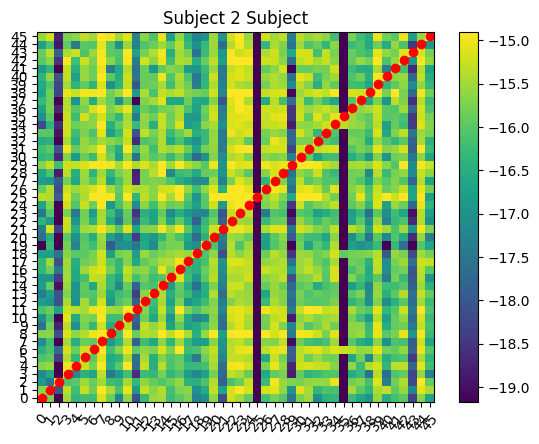

In [33]:
V(Vpa,S,'Subject 2 Subject', [indx for indx in range(46)])

In [19]:
stim = Vpa.stimuli[1]
stim

'AB_Kandinsky.png'

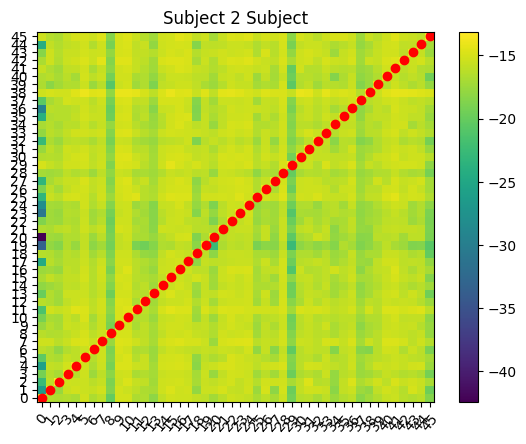

In [81]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[7,8,9,10], stim=stim)

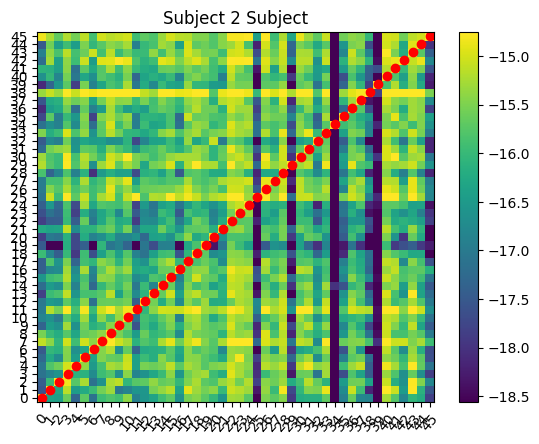

In [82]:
S = Vpa.HMMSimPipelineSubject2Subject(ncomp=[7,8,9,10], stim=stim, vis='scaled')

## Angle Method

In [23]:
def correctSub2Sub(Matrix):
    """
    Remove all the value equal to -np.inf and retrun the corrected matrix and a list of value that are not removed (position)
    """
    position = set()
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            if Matrix[i,j] != -np.inf:
                position.add(i)

    CorrectMatrix = np.zeros((len(position),len(position)))
    position = list(position)
    for i in range(len(position)):
        for j in range(len(position)):
            CorrectMatrix[i,j] = Matrix[position[i],position[j]]

    return CorrectMatrix, position

In [28]:
SimSacP,SimVals,SimValsSD = Vpa.ScanpathSimSubject2Subject(stim=1, nHor=9, Thr=5, inferS=False,normalize='add')

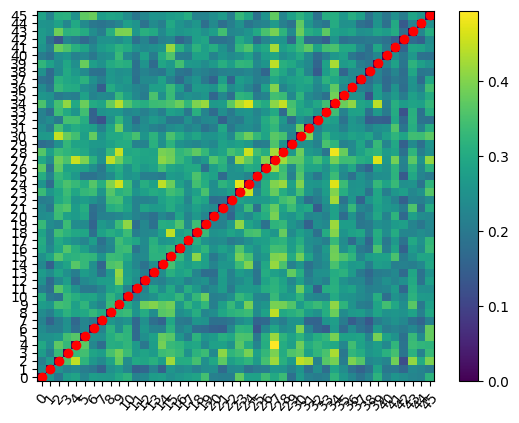

In [29]:
S, ns = correctSub2Sub(SimVals)
Vpa.VisSimmat(S, stimuli=list(ns), negative=True)

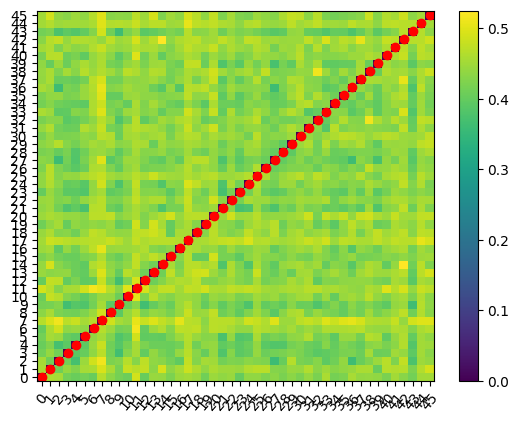

In [30]:
SimSacP,SimVals,SimValsSD = Vpa.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False,method='power')
Vpa.VisSimmat(SimVals, stimuli=list(ns), negative=True)

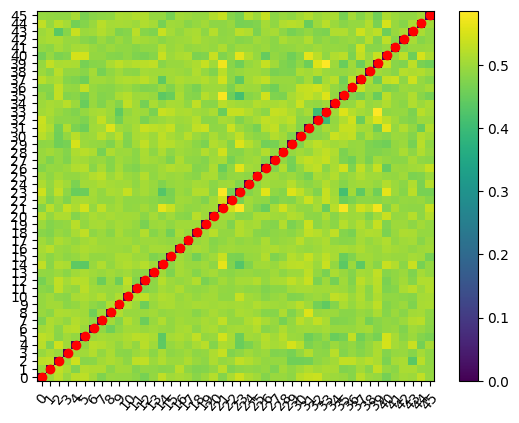

In [31]:
SimSacP,SimVals,SimValsSD = Vpa.ScanpathSimSubject2Subject(stim=1, nHor=9, inferS=False,method='peak180')
Vpa.VisSimmat(SimVals, stimuli=list(ns), negative=True)

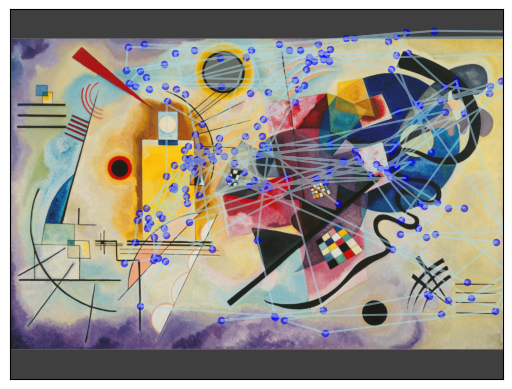

In [16]:

Vpa.VisScanPath(1,visFix=True,scan_path_col='lightblue',allS=24)

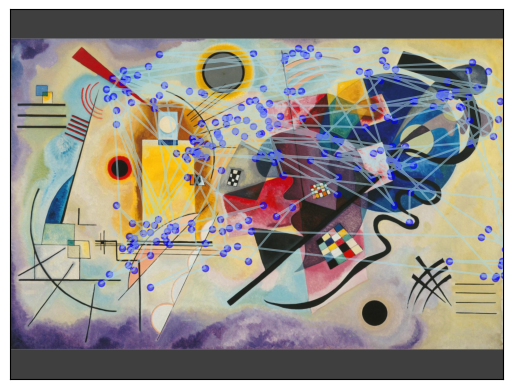

In [25]:
Vpa.VisScanPath(1,visFix=True,scan_path_col='lightblue',allS=34, fixation_col='blue')

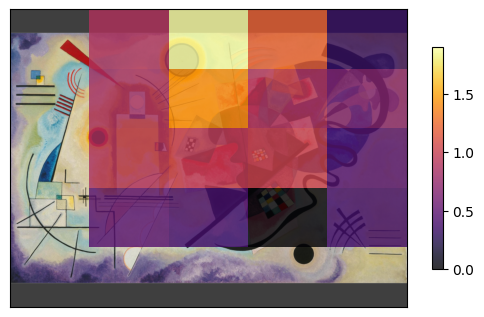

In [21]:
Vpa.VisGrid(SimSacP[24,34],stim,cbar=True,inferS=False,alpha=.8)

Now we can also try with the stimuls 0 that in the Subject to Subject using HMM was not very clear the separation between subjects 

In [40]:
SimSacP,SimVals,SimValsSD = Vpa.ScanpathSimSubject2Subject(stim=0, nHor=5, Thr=5, inferS=False,normalize='add')

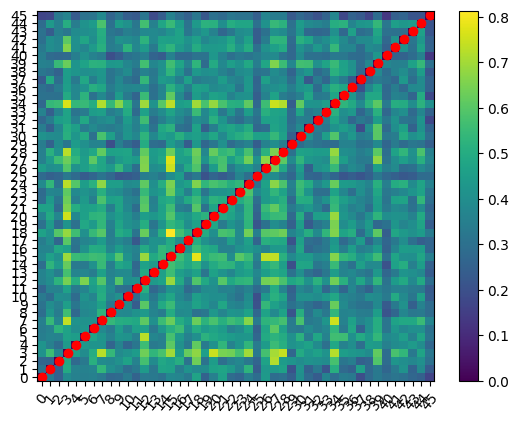

In [41]:
S, ns = correctSub2Sub(SimVals)
Vpa.VisSimmat(S, stimuli=list(ns), negative=True)

In [21]:
Sacc = Vpa.SaccadeSel(Vpa.GetSaccades(), nHor=5, InferS=False)
SimSacP = Vpa.SacSim1Group(Sacc, Thr=10, normalize='add')

In [22]:
S = np.nanmean(np.nanmean(np.nanmean(SimSacP, 4), 3), 2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_38448\780338170.py:1: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(SimSacP, 4), 3), 2)


In [23]:
S.shape

(46, 46)

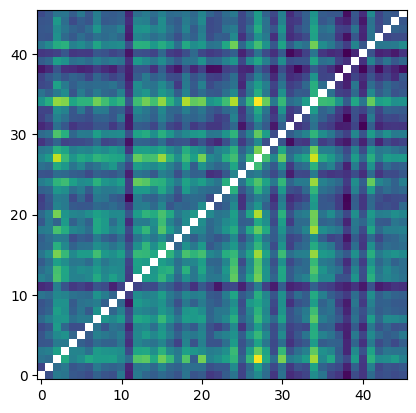

In [24]:
plt.imshow(S, origin='lower')

In [25]:
Sacc = Vpa.SaccadeSel(Vpa.GetSaccades(), nHor=5, InferS=False)
SimSacP = Vpa.SacSim1GroupAll2All(Sacc, Thr=10, normalize='add')

In [26]:
SimSacP.shape

(46, 46, 12, 12, 5, 5)

In [27]:
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 5), 4), 3), 2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_38448\3782371002.py:1: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 5), 4), 3), 2)


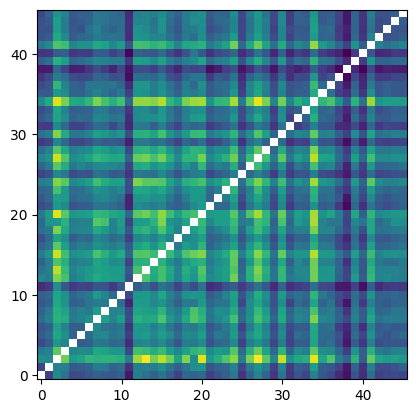

In [28]:
plt.imshow(S, origin='lower')

In [29]:
# Check if the matrix is symmetric
np.allclose(S, S.T)

False

In [30]:
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)

C:\Users\nickp\AppData\Local\Temp\ipykernel_38448\2517902481.py:1: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


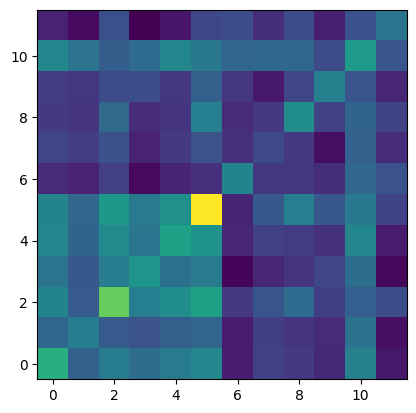

In [31]:
plt.imshow(S, origin='lower')

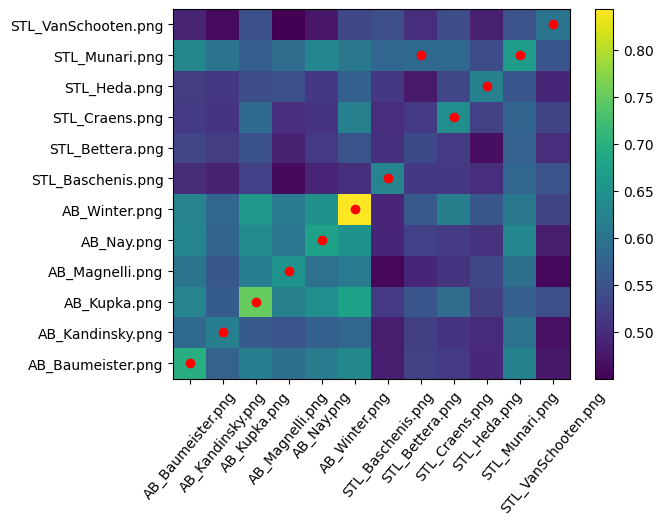

In [33]:
Vpa.VisSimmat(S)

C:\Users\nickp\AppData\Local\Temp\ipykernel_14300\3345647143.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


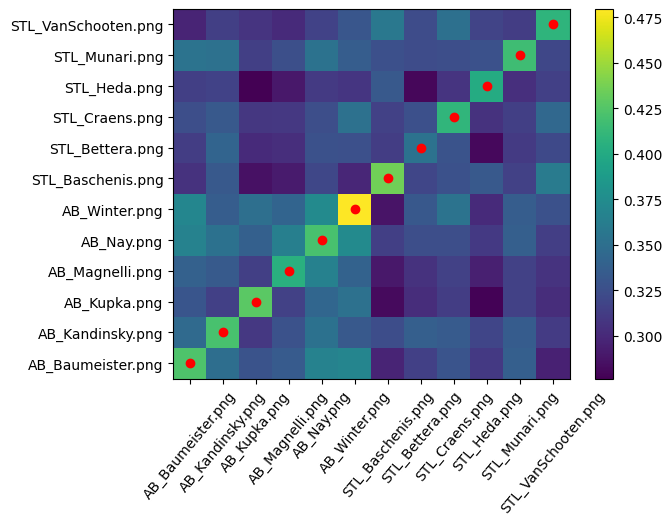

In [32]:
Sacc = Vpa.SaccadeSel(Vpa.GetSaccades(), nHor=9, InferS=False)
SimSacP = Vpa.SacSim1GroupAll2All(Sacc, Thr=10, normalize='add')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
Vpa.VisSimmat(S)

C:\Users\nickp\AppData\Local\Temp\ipykernel_14300\661863940.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


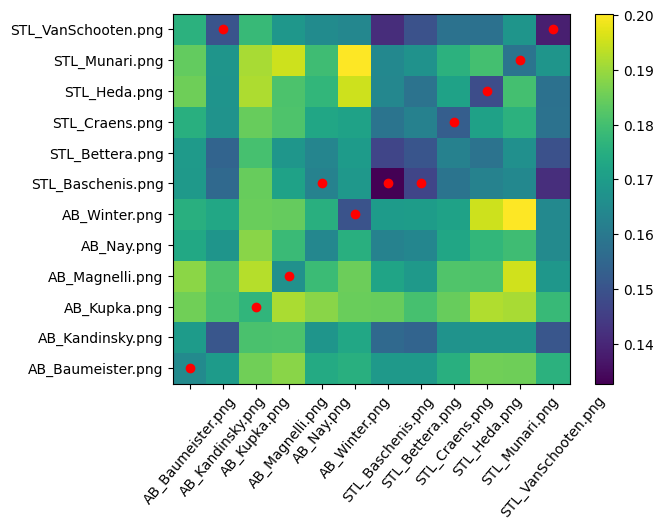

In [41]:
Sacc = Vpa.SaccadeSel(Vpa.GetSaccades(), nHor=9, InferS=False)
SimSacP = Vpa.SacSim1GroupAll2All(Sacc, method='power', power=4)
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
Vpa.VisSimmat(S, negative=True)

C:\Users\nickp\AppData\Local\Temp\ipykernel_14300\4140695379.py:3: RuntimeWarning: Mean of empty slice
  S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)


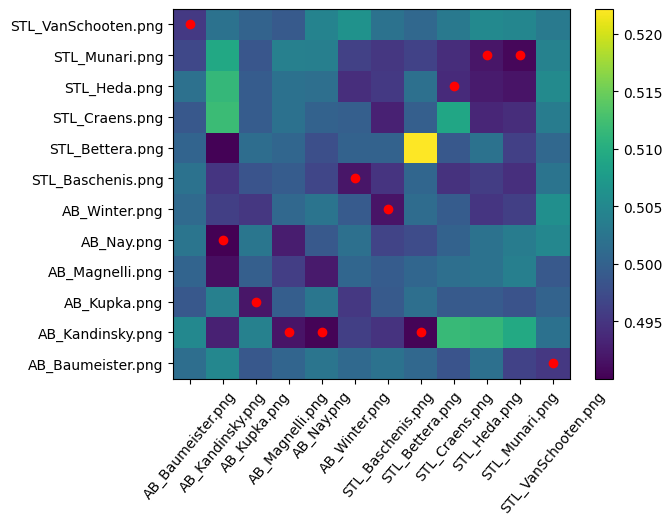

In [37]:
Sacc = Vpa.SaccadeSel(Vpa.GetSaccades(), nHor=20, InferS=False)
SimSacP = Vpa.SacSim1GroupAll2All(Sacc, method='peak180')
S = np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP, 0), 0), 3), 2)
Vpa.VisSimmat(S, negative=True)

---

In conclusion is possible to say that even if both the methods are able to successfully separate different stimuli fixations, the angle method is more coherent, faster and helpfull to give better insights on the results.